In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [11]:
def sigmoid(x):
    return 1/float((1+np.exp(-x)))

In [12]:
sigmoid(0.81)

0.6921095043017882

In [13]:
def inverse_sigmoid(y):
    return -1*np.log((1/y)-1)

In [14]:
p=sigmoid(20)
print(p)
inverse_sigmoid(p)

0.9999999979388463


19.999999966169824

In [15]:
def diff_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [16]:
diff_sigmoid(0.81)

0.21309393835692123

In [17]:
def sigmoidd(x):
    sig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(sigmoid(value))
        sig.append(r)
    return sig

In [18]:
def diff_sigmoidd(x):
    difsig=[]
    for row in x:
        r=[]
        for value in row:
            r.append(diff_sigmoid(value))
        difsig.append(r)
    return difsig

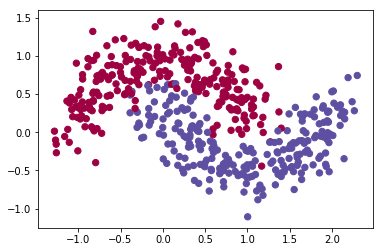

(500, 2)

In [19]:
np.random.seed(0)
X,y=sklearn.datasets.make_moons(500, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()
b=y
k=[]
for v in y:
    k.append([v])
    
y=np.array(k)

X.shape

#print(y)

In [20]:
print(X)

[[ 3.02402326e-01  8.96238169e-01]
 [-3.85982755e-01  4.87309788e-01]
 [ 1.90209311e-01  1.13254278e-01]
 [ 1.71457157e+00 -1.10330489e-01]
 [ 1.96706272e+00 -5.15800798e-01]
 [ 1.37332758e+00  2.66143527e-01]
 [ 1.96645759e-01 -3.17949126e-01]
 [ 2.09079968e+00  3.50945301e-01]
 [-8.27802027e-01  1.31965020e+00]
 [-3.73989147e-01  1.14007928e+00]
 [-1.13332039e+00  4.08038818e-01]
 [ 5.72687378e-02  6.21768767e-01]
 [ 9.85266188e-01 -2.38709756e-01]
 [ 2.56600567e-01  2.87929677e-01]
 [-6.79219220e-01  7.36576149e-01]
 [ 9.17732485e-01 -5.51702973e-01]
 [ 1.89729198e+00  3.46152370e-01]
 [ 7.75991166e-01 -3.53296646e-01]
 [-4.43552426e-01  1.00554191e+00]
 [ 6.31697234e-01  7.81677632e-01]
 [-8.73459010e-01  3.91027380e-01]
 [ 1.02623894e+00 -5.86398923e-01]
 [-1.26041164e+00 -1.56035824e-01]
 [ 3.45432043e-01  9.46494453e-01]
 [ 8.16368558e-01  7.53291667e-01]
 [ 1.49280504e+00 -3.42003043e-01]
 [ 8.88128691e-01  2.80734803e-01]
 [ 8.97080578e-01 -5.52903711e-01]
 [ 3.39555735e-01  9

In [21]:
X.shape[1]

2

In [22]:
#variable initialization

epoch=150 #no. of training iterations
learning_rate=0.1
input_layer_neurons=X.shape[1] #no. of features in dataset
hidden_layer_neurons=5 #no. of hidden layer neurons
output_neurons=2 #number of neurons of output layer

In [23]:
#weight and bias initialization

weight_hidden=np.random.uniform(size=(input_layer_neurons,hidden_layer_neurons))
bais_hidden=np.random.uniform(size=(1,hidden_layer_neurons))
weight_output=np.random.uniform(size=(hidden_layer_neurons,output_neurons))
bais_output=np.random.uniform(size=(1,output_neurons))

In [24]:
for i in range(epoch):
    print(i)
    #Forward Propogation
    
    hidden_layer_input=np.dot(X,weight_hidden)+bais_hidden
    #hidden_layer_input+=bais_hidden
    
    #print(hidden_layer_input)
    
    hidden_layer_activation=sigmoidd(hidden_layer_input)
    
    hidden_layer_activation=np.array(hidden_layer_activation)
    
    output_layer_input=np.dot(hidden_layer_activation,weight_output)
    output_layer_input+=bais_output
    output=sigmoidd(output_layer_input)
    
    #Back Propogation
    gradient_error=y-output  #error at output
    slope_output_layer=diff_sigmoidd(output)
    slope_hidden_layer=diff_sigmoidd(hidden_layer_activation)
    
    delta_output=gradient_error*slope_output_layer
    
    error_at_hidden_layer=np.dot(delta_output,weight_output.T)
    delta_hidden=error_at_hidden_layer*slope_hidden_layer
    
    weight_output+=np.dot(hidden_layer_activation.T,delta_output)*learning_rate
    bais_output+=np.sum(delta_output,axis=0,keepdims=True)*learning_rate
    
    weight_hidden+=np.dot(X.T,delta_hidden)*learning_rate
    bais_hidden+=np.sum(delta_hidden,axis=0,keepdims=True)*learning_rate
    

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [25]:
hidden_layer_activation

array([[2.38866169e-10, 3.39437269e-09, 2.58001727e-22, 9.99995299e-01,
        2.41684163e-18],
       [3.21439851e-08, 2.92067309e-07, 8.06376229e-18, 9.96557622e-01,
        5.16250856e-15],
       [2.23763703e-05, 4.86200093e-05, 1.33387879e-06, 1.19411712e-04,
        3.89915652e-06],
       ...,
       [4.82223979e-13, 3.00238401e-11, 1.04411747e-33, 1.00000000e+00,
        2.10417073e-27],
       [2.74859410e-07, 9.41546680e-07, 5.67590393e-11, 6.12615953e-02,
        2.07206113e-09],
       [1.05787096e-08, 1.26290982e-07, 6.50971457e-20, 9.99769871e-01,
        1.11063558e-16]])

In [26]:
c=0
for i in range(len(y)):
    print(y[i][0],' :: ',round(output[i][0]))
    if int(round(output[i][0]))==y[i][0]:
        c+=1
        
print(c)
print(len(y))
print(c/len(y))

0  ::  0
1  ::  0
1  ::  1
1  ::  1
1  ::  1
0  ::  1
1  ::  1
1  ::  1
0  ::  0
0  ::  0
0  ::  0
1  ::  0
1  ::  1
1  ::  1
0  ::  0
1  ::  1
1  ::  1
1  ::  1
0  ::  0
0  ::  0
0  ::  0
1  ::  1
0  ::  1
0  ::  0
0  ::  0
1  ::  1
0  ::  1
1  ::  1
0  ::  0
0  ::  0
1  ::  1
0  ::  0
0  ::  0
0  ::  0
1  ::  1
1  ::  1
1  ::  1
1  ::  1
1  ::  1
0  ::  0
1  ::  1
0  ::  0
1  ::  1
0  ::  0
0  ::  0
0  ::  1
0  ::  0
1  ::  1
1  ::  1
0  ::  0
1  ::  1
0  ::  0
1  ::  1
0  ::  0
0  ::  0
0  ::  1
1  ::  1
0  ::  0
0  ::  0
1  ::  1
0  ::  0
1  ::  1
1  ::  1
1  ::  1
1  ::  1
0  ::  0
0  ::  1
1  ::  1
1  ::  0
0  ::  0
0  ::  0
0  ::  0
1  ::  1
1  ::  1
0  ::  0
1  ::  1
1  ::  0
0  ::  0
1  ::  1
1  ::  1
1  ::  1
0  ::  0
1  ::  1
0  ::  0
1  ::  1
1  ::  1
1  ::  1
0  ::  0
1  ::  1
0  ::  1
0  ::  0
1  ::  1
1  ::  1
0  ::  0
0  ::  0
1  ::  1
0  ::  0
1  ::  1
0  ::  0
0  ::  0
0  ::  0
1  ::  1
0  ::  0
1  ::  1
0  ::  1
1  ::  1
0  ::  0
0  ::  1
1  ::  1
0  ::  0
1  ::  1
0

[[0.05838203687437899, 0.05840455989153957], [0.5075070289627106, 0.5064776011203497]]


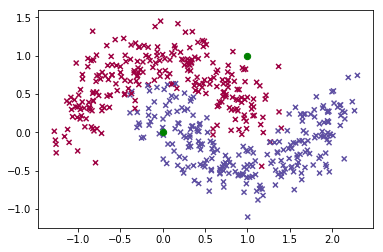

In [27]:
X_predict=[[1,1],[0,0]]

X_plot=np.array(X_predict)


plt.scatter(X[:,0], X[:,1], s=25, c=b,marker='x',cmap=plt.cm.Spectral)
plt.scatter(X_plot[:,0],X_plot[:,1],c='g',s=40)

hidden_layer_input=np.dot(X_predict,weight_hidden)+bais_hidden
    #hidden_layer_input+=bais_hidden
    
    #print(hidden_layer_input)
    
hidden_layer_activation=sigmoidd(hidden_layer_input)
    
hidden_layer_activation=np.array(hidden_layer_activation)
    
output_layer_input=np.dot(hidden_layer_activation,weight_output)
output_layer_input+=bais_output
output=sigmoidd(output_layer_input)
print(output)